In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.patches as mpatches

## SPD - with interference- 60 Nodes - 200mx200m - 40m range

In [327]:
df = pd.read_csv('C:\\omnetpp-5.6.2\\samples\\tarp-sim\\results\\new\\data_17\\data_spd_2_n_60_p_900_pdf_csma.csv')

In [328]:
df.head()

,run,PauseTime,repetition,Module,echoedPk:count,echoedPk:sum(packetBytes),packetReceived:count,packetReceived:sum(packetBytes),packets received,packets sent,packetSent:count,packetSent:sum(packetBytes)
0,RandomWaypointMobility-SPD-B-75-20220228-14:04...,900,15,TARPNetwork.node[17].app[0],NaN,NaN,718.0,718000.0,718.0,900.0,900.0,900000.0
1,RandomWaypointMobility-SPD-B-71-20220228-14:02...,900,11,TARPNetwork.node[17].app[0],NaN,NaN,427.0,427000.0,427.0,900.0,900.0,900000.0
2,RandomWaypointMobility-SPD-B-71-20220228-14:02...,900,11,TARPNetwork.node[22].app[0],863.0,863000.0,NaN,NaN,NaN,NaN,NaN,NaN
3,RandomWaypointMobility-SPD-B-75-20220228-14:04...,900,15,TARPNetwork.node[22].app[0],804.0,804000.0,NaN,NaN,NaN,NaN,NaN,NaN
4,RandomWaypointMobility-SPD-B-86-20220228-14:10...,900,26,TARPNetwork.node[17].app[0],NaN,NaN,829.0,829000.0,829.0,900.0,900.0,900000.0


In [329]:
df.Module = df.Module.str.split('[',expand=True)[1].str.split(']',expand=True)[0]

In [330]:
df = df.sort_values(by=['repetition'])

In [331]:
df_17 = df.loc[df['Module'] == '17']
df_22 = df.loc[df['Module'] == '22']

In [332]:
results = []
results_x = []
count = 0

for index, row in df_17.iterrows():
        x = df_22.iloc[count]["echoedPk:count"]
        res = round((row['packetReceived:count'] + x)/(x + row['packetSent:count']), 4) 
        results.append(res)
        res_x = round((x)/(row['packetSent:count']), 4) 
        results_x.append(res_x)
        count+=1


In [333]:
print (results)   

[0.7991, 0.7794, 0.8692, 0.8814, 0.9236, 0.9565, 0.7616, 0.9438, 0.5954, 0.6536, 0.9027, 0.7317, 0.8389, 0.9159, 0.7394, 0.8932, 0.9279, 0.8052, 0.7735, 0.7677, 0.9778, 0.8719, 0.9503, 0.7218, 0.791, 0.8697, 0.9604, 0.9265, 0.9563, 0.9248]


In [334]:
print (results_x) 

[0.88, 0.6922, 0.9878, 0.9867, 0.9789, 0.9933, 0.99, 0.9578, 0.9911, 0.8989, 0.9178, 0.9589, 0.89, 0.9422, 0.91, 0.8933, 0.9267, 0.9567, 0.8056, 0.99, 0.9978, 0.8911, 0.9878, 0.9333, 0.9833, 0.91, 0.9933, 0.98, 0.9811, 0.9811]


In [335]:
print("Mean:", round(sum(results) / len(results)*100,2))

Mean: 84.7


In [336]:
print("Mean:", round(sum(results_x) / len(results_x)*100,2))

Mean: 93.96


In [337]:
df_dd_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[96.26, 95.25, 94.62, 94.82, 93.74, 92.46, 94.82, 97.98]})

dd_x_errors = [0.667, 1.14, 1.21, 1.21, 1.53, 3.4, 2.67, 0.959]


df_spd_1_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[72.61, 68.85, 66.5, 66.19, 63.68, 69.43, 80.55, 90.8]})

spd_1_x_errors = [2.86, 3.53, 2.37, 3.58, 3.96, 4.46, 2.73, 2.66]


df_spd_2_x = pd.DataFrame({'PauseTime':[0, 30, 60, 90, 120, 300, 600, 900],
                       'PDF':[82.1, 77.67, 76.65, 77.64, 76.06, 79.23, 87.89, 93.96]})

spd_2_x_errors = [2.06, 2.23, 1.61, 3.33, 4.17, 4.49, 3.49, 2.33]

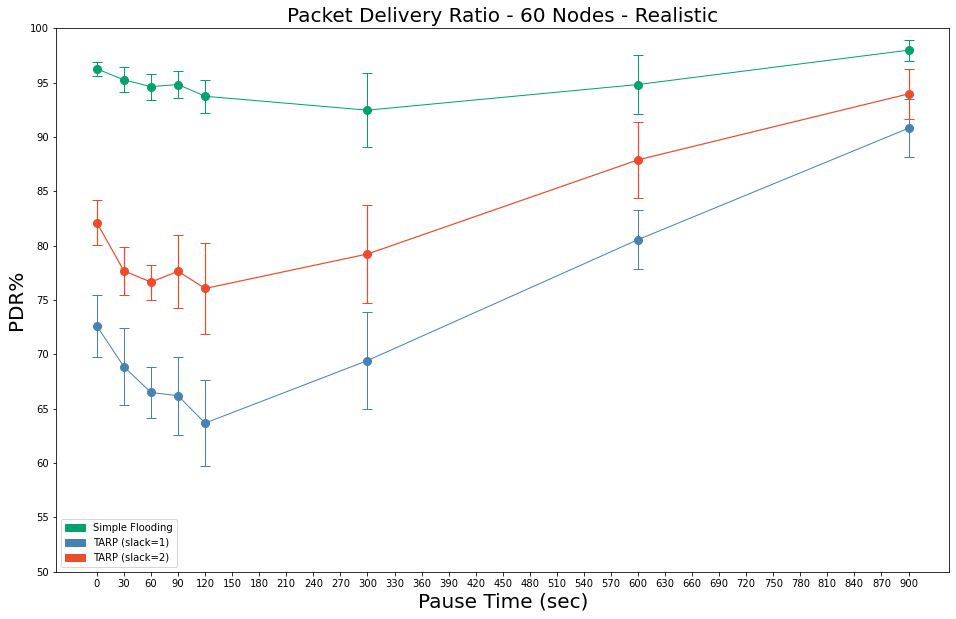

In [340]:
plt.xlabel("Pause Time (sec)", fontsize=20)
plt.ylabel("PDR%", fontsize=20)
plt.title("Packet Delivery Ratio - 60 Nodes - Realistic", fontsize=20)

plt.xticks(np.arange(0,901, 30), fontsize=10)
plt.yticks(np.arange(0,101, 5), fontsize=10)
# plt.grid()

# plt.plot(df_dd_x.PauseTime, df_dd_x.PDF,  'g-x') 

# plt.plot(df_spd_1_x.PauseTime, df_spd_1_x.PDF,  'b-x') 

# plt.plot(df_spd_2_x.PauseTime, df_spd_2_x.PDF,  'r-x') 

plt.ylim([50, 100])

plt.errorbar(
  x=df_dd_x.PauseTime, 
  y=df_dd_x.PDF, 
  yerr=dd_x_errors, 
  capsize=5,
  marker='o', 
  color='#00A36C', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_1_x.PauseTime, 
  y=df_spd_1_x.PDF, 
  yerr=spd_1_x_errors, 
  capsize=5,
  marker='o', 
  color='#4682B4', 
  markersize=8, 
  linewidth=1, 
  linestyle='-')

plt.errorbar(
  x=df_spd_2_x.PauseTime, 
  y=df_spd_2_x.PDF, 
  yerr=spd_2_x_errors, 
  capsize=5,
  marker='o', 
  color='#EE4B2B', 
  markersize=8, 
  linewidth=1.2, 
  linestyle='-')


red_patch = mpatches.Patch(color='#EE4B2B', label='TARP (slack=2)')
green_patch = mpatches.Patch(color='#00A36C', label='Simple Flooding')
blue_patch = mpatches.Patch(color='#4682B4', label='TARP (slack=1)')

plt.legend(handles=[ green_patch, blue_patch, red_patch])

fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.savefig('final-simulation-pdf-60-new-realistic.png', dpi=300)